# Algoritmo de classificação Naive Bayes

O algoritmo Naive Bayes é baseado no teorema de Bayes, e parte da suposição de que as variávies preditoras são independentes.


O método calcula a probabilidade de cada classe no conjunto de treino, criando uma tabela.
Esta tabelea é utilizada para realizar as previsões de classificações, ou seja, para encontrar uma probabilidade a posteriori (possuir a caracteristica de interesse, dado que recebeu um resultado positivo), isso,  multiplicando a probabilidade a priori (possuir a caracteristica de interesse) pela probabilidade de receber um resultado positivo, dado que tem a caracteristica de interesse.


Este é mais utilizado para probleamas de processamento de linguagem natural, contudo, ele foi utilizado neste exemplo afim de aprendizagem e aplicação do método.

In [1]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import pickle

In [2]:
from sklearn.naive_bayes import GaussianNB

In [3]:
with open('credit.pkl','rb') as f:
    X_credit_treinamento, y_credit_treinamento, X_credit_teste, y_credit_teste = pickle.load(f)

In [4]:
X_credit_treinamento.shape, y_credit_treinamento.shape

((24435, 20), (24435,))

In [5]:
X_credit_treinamento

array([[-0.92160841,  0.22466383, -1.00959144, ..., -0.46268575,
         0.46268575, -0.69155444],
       [ 0.36779533,  0.01492609, -1.00959144, ..., -0.46268575,
         0.46268575,  0.04828407],
       [-0.43808201, -0.1115619 ,  0.99049969, ..., -0.46268575,
         0.46268575, -0.44494161],
       ...,
       [-0.92160841, -0.44488358,  0.99049969, ..., -0.46268575,
         0.46268575, -0.93816728],
       [-0.76043294, -0.38841572,  0.99049969, ..., -0.46268575,
         0.46268575, -0.93816728],
       [-0.76043294, -0.5174851 , -1.00959144, ..., -0.46268575,
         0.46268575, -0.93816728]])

In [6]:
X_credit_teste.shape, y_credit_teste.shape

((8146, 20), (8146,))

In [7]:
naive_credit = GaussianNB()
naive_credit.fit(X_credit_treinamento,y_credit_treinamento)
previsoes = naive_credit.predict(X_credit_teste)
previsoes

array([0, 1, 0, ..., 1, 0, 1])

In [8]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [9]:
accuracy_score(y_credit_teste, previsoes)

0.8003928308372207

In [10]:
confusion_matrix(y_credit_teste, previsoes)

array([[5383, 1099],
       [ 527, 1137]])

In [11]:
from yellowbrick.classifier import ConfusionMatrix

0.8003928308372207

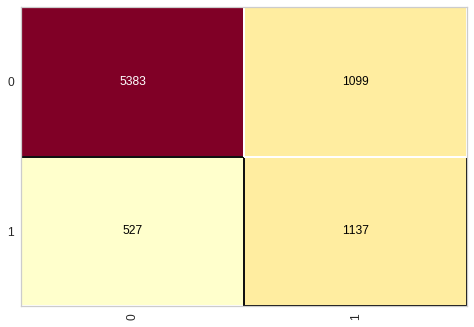

In [12]:
cm = ConfusionMatrix(naive_credit)
cm.fit(X_credit_treinamento,y_credit_treinamento)
cm.score(X_credit_teste,y_credit_teste)

In [13]:
print(classification_report(y_credit_teste,previsoes))

              precision    recall  f1-score   support

           0       0.91      0.83      0.87      6482
           1       0.51      0.68      0.58      1664

    accuracy                           0.80      8146
   macro avg       0.71      0.76      0.73      8146
weighted avg       0.83      0.80      0.81      8146



## Conclusão

De acordo com o  `classification_report`, o algortimo está conseguindo classificar melhor a classe 0 do que a classe 1, ou seja, ele está conseguindo identificar melhor os clientes não inadimplentes. Ao identificar a classe 0, 83% dos dados são classificados corretamente e quando ele prevê um caso de não inadimplência acerta 91% dos casos.